In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
 
%matplotlib inline

In [2]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
 
print(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)

170500096/170498071 [==============================] - 4s 0us/step
(50000, 32, 32, 3) (50000, 1)


(None, ((10000, 32, 32, 3), (10000, 1)))

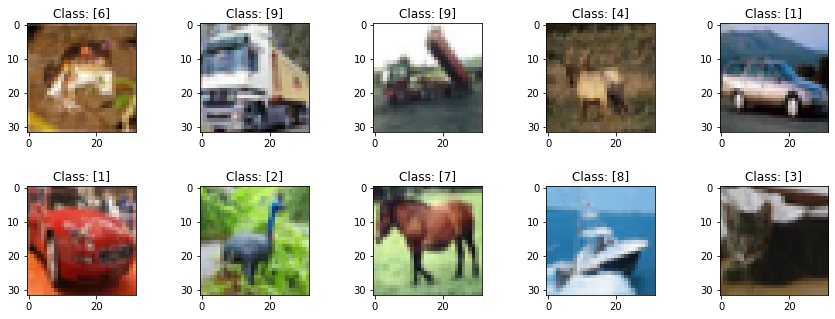

In [8]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15,5))
ax = axes.ravel()
for i in range(10):
  ax[i].imshow(X_train[i].reshape(32,32,3), cmap='gray')
  ax[i].title.set_text('Class: '+str(y_train[i]))
plt.subplots_adjust(hspace=0.5)

In [9]:
X_train = X_train/ 255
X_test = X_test/ 255

In [10]:
y_cat_train = to_categorical(y_train, 10)
y_cat_test = to_categorical(y_test, 10)

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPool2D, Activation

In [12]:
model = Sequential()
 
model.add(Conv2D(filters=16, kernel_size=(4, 4), strides=(1,1),
                 padding='valid', input_shape = (32, 32, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=16, kernel_size=(4,4)))
model.add(Flatten())
model.add(Dense(256, activation ='relu'))
model.add(Dense(10, activation="softmax"))
 
model.compile(loss="categorical_crossentropy", optimizer = 'adam',
              metrics =["categorical_accuracy"])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 29, 29, 16)        784       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 16)        4112      
_________________________________________________________________
flatten (Flatten)            (None, 1936)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               495872    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2570      
Total params: 503,338
Trainable params: 503,338
Non-trainable params: 0
__________________________________________________

In [14]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
path = "/content/checkpoint"
early_stop = EarlyStopping(monitor = 'val_loss', patience=10)
checkpoint = ModelCheckpoint(filepath = path, save_weights_only= True, save_best_only = True)

In [15]:
model.fit(X_train, y_cat_train, validation_data=(X_test, y_cat_test),
          epochs =15,verbose=1, callbacks =[early_stop, checkpoint])

Epoch 1/15
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4194 - categorical_accuracy: 0.4933 - val_loss: 1.1985 - val_categorical_accuracy: 0.5760
Epoch 2/15
1563/1563 [==============================] - 7s 4ms/step - loss: 1.0869 - categorical_accuracy: 0.6186 - val_loss: 1.0860 - val_categorical_accuracy: 0.6197
Epoch 3/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9257 - categorical_accuracy: 0.6783 - val_loss: 1.0275 - val_categorical_accuracy: 0.6460
Epoch 4/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7965 - categorical_accuracy: 0.7233 - val_loss: 1.0147 - val_categorical_accuracy: 0.6583
Epoch 5/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.6962 - categorical_accuracy: 0.7573 - val_loss: 1.0215 - val_categorical_accuracy: 0.6576
Epoch 6/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.5856 - categorical_accuracy: 0.7967 - val_loss: 1.1351 - val_categorical_accuracy:

In [16]:
model.evaluate(X_test, y_cat_test)

313/313 [==============================] - 1s 3ms/step - loss: 2.3471 - categorical_accuracy: 0.6454


[2.347052812576294, 0.6453999876976013]

In [18]:
predictions = model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [20]:
from sklearn.metrics import classification_report
print(classification_report(predictions, y_test))

              precision    recall  f1-score   support

           0       0.63      0.73      0.68       858
           1       0.76      0.79      0.77       958
           2       0.57      0.51      0.53      1121
           3       0.42      0.49      0.45       846
           4       0.64      0.56      0.60      1150
           5       0.56      0.53      0.54      1059
           6       0.69      0.69      0.69      1006
           7       0.72      0.68      0.70      1059
           8       0.72      0.83      0.77       870
           9       0.75      0.70      0.72      1073

    accuracy                           0.65     10000
   macro avg       0.65      0.65      0.65     10000
weighted avg       0.65      0.65      0.64     10000



# To improve model,let add more convolution layers

In [63]:
model = Sequential()
 
model.add(Conv2D(filters=32, kernel_size=(2,2), strides=(1,1),
                 padding='valid', input_shape = (32, 32, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(4,4), padding='valid', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(2,2), padding='valid', activation='relu'))
model.add(Flatten())
model.add(Dense(256, activation ='relu'))
model.add(Dense(10, activation ='softmax'))
#model.add(Activation("softmax"))
 
model.compile(loss="categorical_crossentropy", optimizer = 'adam',
              metrics =["categorical_accuracy"])

In [64]:
model.fit(X_train, y_cat_train, validation_data=(X_test, y_cat_test),
          epochs =15,verbose=1, callbacks =[early_stop, checkpoint])

Epoch 1/15
1563/1563 [==============================] - 7s 4ms/step - loss: 1.4066 - categorical_accuracy: 0.4925 - val_loss: 1.2148 - val_categorical_accuracy: 0.5636
Epoch 2/15
1563/1563 [==============================] - 7s 4ms/step - loss: 1.0256 - categorical_accuracy: 0.6369 - val_loss: 0.9840 - val_categorical_accuracy: 0.6528
Epoch 3/15
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8522 - categorical_accuracy: 0.7006 - val_loss: 0.9484 - val_categorical_accuracy: 0.6719
Epoch 4/15
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7243 - categorical_accuracy: 0.7458 - val_loss: 0.8321 - val_categorical_accuracy: 0.7136
Epoch 5/15
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6109 - categorical_accuracy: 0.7874 - val_loss: 0.9061 - val_categorical_accuracy: 0.6964
Epoch 6/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.5126 - categorical_accuracy: 0.8197 - val_loss: 0.8437 - val_categorical_accuracy:

In [65]:
model.evaluate(X_test, y_cat_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.7211 - categorical_accuracy: 0.7060


[1.7211495637893677, 0.7059999704360962]

In [66]:
predictions = model.predict_classes(X_test)
print(classification_report(predictions, y_test))

              precision    recall  f1-score   support

           0       0.79      0.70      0.74      1120
           1       0.85      0.79      0.82      1078
           2       0.59      0.62      0.60       960
           3       0.53      0.50      0.51      1059
           4       0.74      0.62      0.67      1189
           5       0.57      0.62      0.60       917
           6       0.73      0.82      0.77       895
           7       0.74      0.78      0.76       957
           8       0.77      0.86      0.81       903
           9       0.74      0.81      0.77       922

    accuracy                           0.71     10000
   macro avg       0.71      0.71      0.71     10000
weighted avg       0.71      0.71      0.71     10000



In [69]:
model = Sequential()
 
model.add(Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding='valid', input_shape = (32, 32, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(5,5), padding='valid', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(7,7), padding='same', activation='relu'))
model.add(Flatten())
model.add(Dense(256, activation ='relu'))
model.add(Dense(10, activation ='softmax'))
#model.add(Activation("softmax"))
 
model.compile(loss="categorical_crossentropy", optimizer = 'adam',
              metrics =["categorical_accuracy"])

model.fit(X_train, y_cat_train, validation_data=(X_test, y_cat_test),
          epochs =15,verbose=1, callbacks =[early_stop, checkpoint])

Epoch 1/15
1563/1563 [==============================] - 14s 9ms/step - loss: 1.4210 - categorical_accuracy: 0.4818 - val_loss: 1.1227 - val_categorical_accuracy: 0.6081
Epoch 2/15
1563/1563 [==============================] - 14s 9ms/step - loss: 0.9461 - categorical_accuracy: 0.6667 - val_loss: 0.8608 - val_categorical_accuracy: 0.6946
Epoch 3/15
1563/1563 [==============================] - 14s 9ms/step - loss: 0.7559 - categorical_accuracy: 0.7336 - val_loss: 0.8773 - val_categorical_accuracy: 0.7016
Epoch 4/15
1563/1563 [==============================] - 14s 9ms/step - loss: 0.6242 - categorical_accuracy: 0.7785 - val_loss: 0.7983 - val_categorical_accuracy: 0.7308
Epoch 5/15
1563/1563 [==============================] - 14s 9ms/step - loss: 0.4966 - categorical_accuracy: 0.8241 - val_loss: 0.7996 - val_categorical_accuracy: 0.7344
Epoch 6/15
1563/1563 [==============================] - 14s 9ms/step - loss: 0.3825 - categorical_accuracy: 0.8644 - val_loss: 0.9401 - val_categorical_acc

In [70]:
print(model.evaluate(X_test, y_cat_test))
predictions = model.predict_classes(X_test)
print(classification_report(predictions, y_test))

313/313 [==============================] - 1s 4ms/step - loss: 1.7506 - categorical_accuracy: 0.7293
[1.7505629062652588, 0.7293000221252441]
              precision    recall  f1-score   support

           0       0.78      0.77      0.78      1006
           1       0.85      0.86      0.85       986
           2       0.60      0.63      0.61       949
           3       0.54      0.53      0.54      1019
           4       0.74      0.63      0.68      1177
           5       0.59      0.66      0.62       894
           6       0.84      0.75      0.79      1123
           7       0.72      0.80      0.75       899
           8       0.83      0.84      0.83       983
           9       0.81      0.84      0.82       964

    accuracy                           0.73     10000
   macro avg       0.73      0.73      0.73     10000
weighted avg       0.73      0.73      0.73     10000

